In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [115]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\Groceries_data.csv")

In [116]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [118]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

**NO NULL VALUES DEtected here we have to change dtype of Date to timeseries  and member_number to str**

In [119]:
df['Date'] = pd.to_datetime(df['Date'])

df['Member_number'] = df['Member_number'].astype('str')
df.dtypes

Member_number              object
Date               datetime64[ns]
itemDescription            object
dtype: object

In [120]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


# Data Visualization

In [121]:
# top 10 sold items
Top_10_sold = df.groupby('itemDescription').size().reset_index(name= 'Total').sort_values(by='Total',
                                                                ascending = False).head(10)

In [122]:
Top_10_sold 

,itemDescription,Total
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


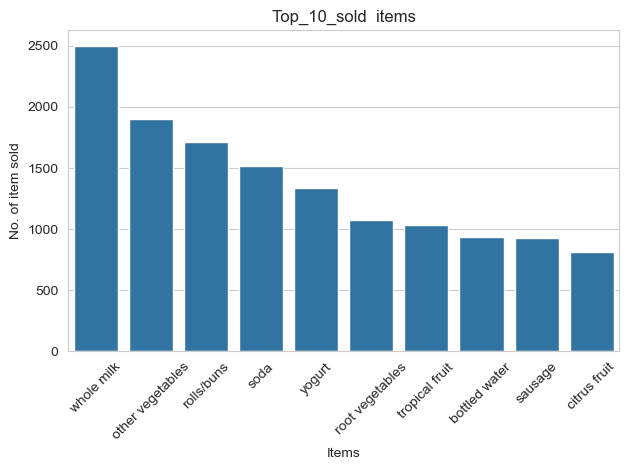

In [123]:
# barplot

sns.barplot(x='itemDescription', y = 'Total', data = Top_10_sold)
plt.title('Top_10_sold  items')
plt.xlabel('Items')
plt.ylabel('No. of item sold')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

In [124]:
df1 = df.set_index(['Date'])
df1.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk


In [125]:
# weekly sales

weekly_sale = df1.resample('W')['itemDescription'].count().reset_index(name='count')
weekly_sale.head()

,Date,count
0,2014-01-05,247
1,2014-01-12,359
2,2014-01-19,320
3,2014-01-26,331
4,2014-02-02,376


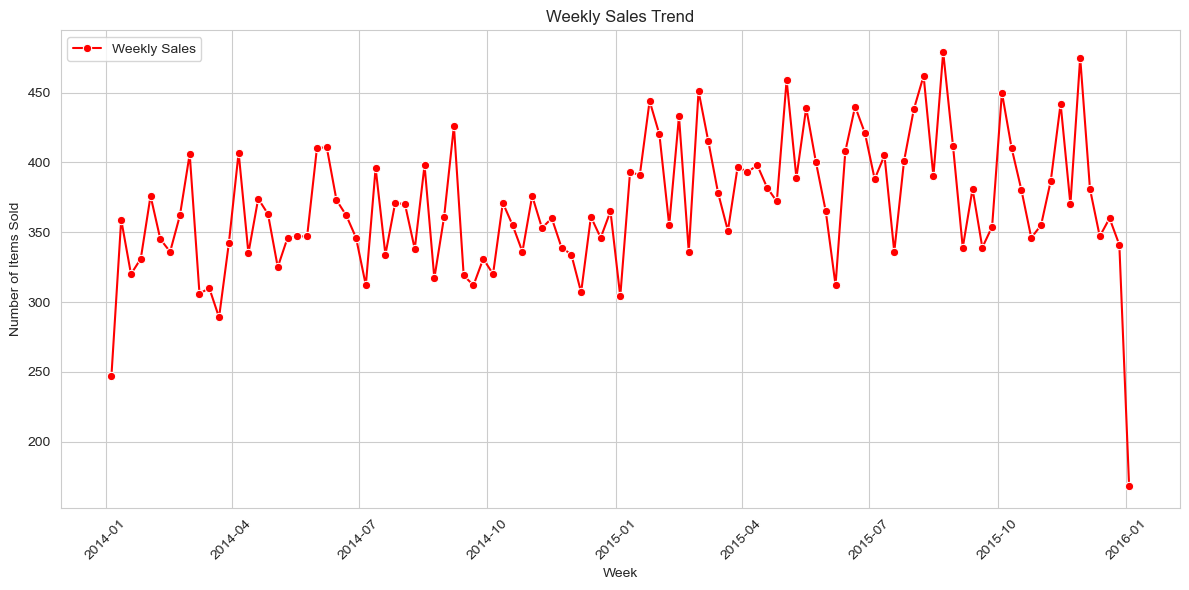

In [126]:


# Set the Seaborn style to whitegrid
sns.set_style('whitegrid')

# Plot weekly sales using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sale, x='Date', y='count', marker='o', color='red', label='Weekly Sales')

# Add titles and labels
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


In [127]:
# monthly sales


monthly_sale = df1.resample('m')['itemDescription'].count().reset_index(name='count')
monthly_sale

,Date,count
0,2014-01-31,1527
1,2014-02-28,1437
2,2014-03-31,1411
3,2014-04-30,1561
4,2014-05-31,1615
5,2014-06-30,1570
6,2014-07-31,1576
7,2014-08-31,1575
8,2014-09-30,1472
9,2014-10-31,1591


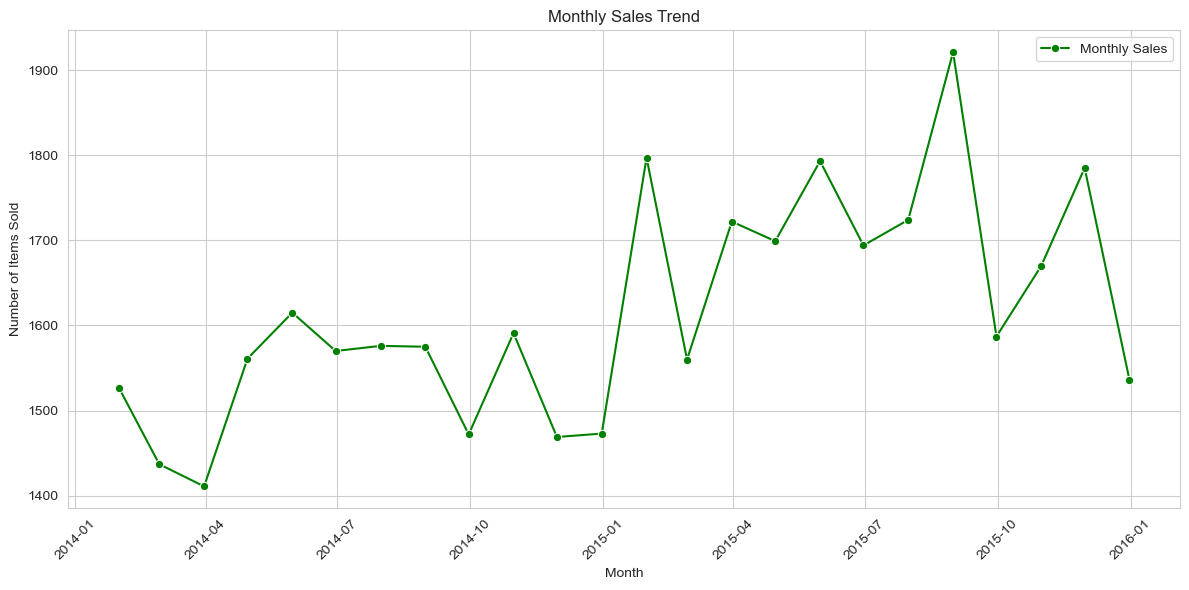

In [128]:

# Set the Seaborn style to whitegrid
sns.set_style('whitegrid')

# Plot monthly sales using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sale, x='Date', y='count', marker='o', color='g', label='Monthly Sales')

# Add titles and labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


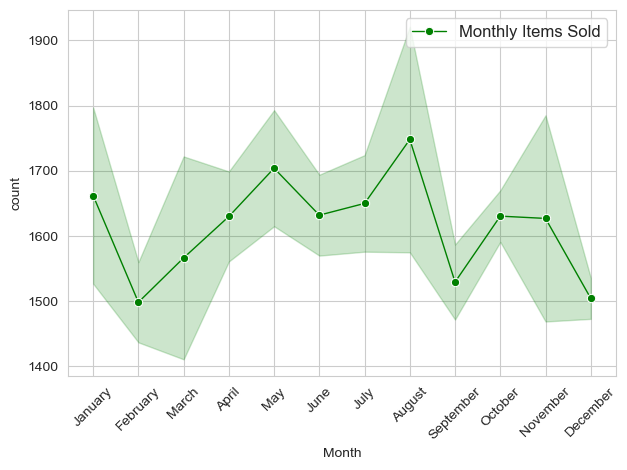

In [129]:
monthly_sale['Date'] = pd.to_datetime(monthly_sale['Date'])

# Extract month names for x-axis
monthly_sale['Month'] = monthly_sale['Date'].dt.strftime('%B')

sns.set_style('whitegrid')
sns.lineplot(data=monthly_sale, x='Month', y='count', marker='o', color='g',
             label='Monthly Items Sold', linewidth = 1)


plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Transform transcactional data into basket  format (TRANSACTION MATRIX)**

In [130]:
# Group by Member_number and itemDescription, then create a basket format
transaction_matrix = df.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
transaction_matrix.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


Here each row displays the transaction of each columnsrepresent the item boughts
The numbers correspnding to this matrix represent ni. of items bought togather


In [131]:
# cross check it

transaction_matrix['whole milk'].sum()

2502

# Encoding

In [132]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(x):
    if x <= 0:
        return False
    if x >= 1:
        return True



In [133]:
# Apply one-hot encoding: Each item is either bought (1) or not (0)
basket_final = transaction_matrix.applymap(lambda x: True if x > 0 else False)

# Display the final one-hot encoded transaction matrix
basket_final.head(20)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Apriori

In [134]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_final, min_support=0.025, use_colnames=True).sort_values(by = 'support')
frequent_itemsets.head(20)

,support,itemsets
405,0.025141,"(sliced cheese, whole milk)"
480,0.025141,"(frankfurter, yogurt, whole milk)"
467,0.025141,"(tropical fruit, citrus fruit, whole milk)"
85,0.025141,"(beef, pip fruit)"
119,0.025141,"(chocolate, bottled water)"
412,0.025141,"(specialty bar, whole milk)"
524,0.025141,"(pastry, root vegetables, whole milk)"
161,0.025141,"(butter, shopping bags)"
540,0.025141,"(rolls/buns, yogurt, shopping bags)"
69,0.025141,(spread cheese)


In [135]:
from mlxtend.frequent_patterns import association_rules

#pd.set_option('display.max_rows', None)

In [136]:
# Association Rules


res = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.5, num_itemsets = 10)

In [137]:
res.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(frankfurter, yogurt)",(whole milk),0.042073,0.458184,0.025141,0.597561,1.304195,1.0,0.005864,1.346331,0.243488,0.052916,0.257241,0.326216
1,"(tropical fruit, citrus fruit)",(whole milk),0.046434,0.458184,0.025141,0.541436,1.181702,1.0,0.003866,1.181551,0.161250,0.052434,0.153655,0.298154
2,"(pastry, root vegetables)",(whole milk),0.046691,0.458184,0.025141,0.538462,1.175209,1.0,0.003748,1.173935,0.156389,0.052406,0.148164,0.296666
3,"(tropical fruit, shopping bags)",(whole milk),0.044638,0.458184,0.025141,0.563218,1.229241,1.0,0.004689,1.240474,0.195204,0.052632,0.193857,0.309045
4,"(curd, yogurt)",(whole milk),0.040277,0.458184,0.025398,0.630573,1.376246,1.0,0.006943,1.466641,0.284859,0.053688,0.318170,0.343002


In [138]:
# Association Rules


rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1, num_itemsets = 10)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sliced cheese),(whole milk),0.051821,0.458184,0.025141,0.485149,1.058852,1.0,0.001397,1.052374,0.058618,0.051852,0.049767,0.270010
1,(whole milk),(sliced cheese),0.458184,0.051821,0.025141,0.054871,1.058852,1.0,0.001397,1.003227,0.102582,0.051852,0.003216,0.270010
2,"(frankfurter, yogurt)",(whole milk),0.042073,0.458184,0.025141,0.597561,1.304195,1.0,0.005864,1.346331,0.243488,0.052916,0.257241,0.326216
3,"(frankfurter, whole milk)",(yogurt),0.067984,0.282966,0.025141,0.369811,1.306913,1.0,0.005904,1.137809,0.251968,0.077165,0.121118,0.229330
4,"(yogurt, whole milk)",(frankfurter),0.150590,0.137506,0.025141,0.166951,1.214130,1.0,0.004434,1.035345,0.207632,0.095610,0.034138,0.174893


In [139]:
result = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [140]:
result.head(10)

,antecedents,consequents,support,confidence,lift
0,(sliced cheese),(whole milk),0.025141,0.485149,1.058852
1,(whole milk),(sliced cheese),0.025141,0.054871,1.058852
2,"(frankfurter, yogurt)",(whole milk),0.025141,0.597561,1.304195
3,"(frankfurter, whole milk)",(yogurt),0.025141,0.369811,1.306913
4,"(yogurt, whole milk)",(frankfurter),0.025141,0.166951,1.214130
5,(frankfurter),"(yogurt, whole milk)",0.025141,0.182836,1.214130
6,(yogurt),"(frankfurter, whole milk)",0.025141,0.088849,1.306913
7,(whole milk),"(frankfurter, yogurt)",0.025141,0.054871,1.304195
8,"(tropical fruit, citrus fruit)",(whole milk),0.025141,0.541436,1.181702
9,"(tropical fruit, whole milk)",(citrus fruit),0.025141,0.215859,1.163788


In [141]:
result = res[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [142]:
result.head(10)

,antecedents,consequents,support,confidence,lift
0,"(frankfurter, yogurt)",(whole milk),0.025141,0.597561,1.304195
1,"(tropical fruit, citrus fruit)",(whole milk),0.025141,0.541436,1.181702
2,"(pastry, root vegetables)",(whole milk),0.025141,0.538462,1.175209
3,"(tropical fruit, shopping bags)",(whole milk),0.025141,0.563218,1.229241
4,"(curd, yogurt)",(whole milk),0.025398,0.630573,1.376246
5,"(other vegetables, frozen vegetables)",(whole milk),0.025654,0.561798,1.226141
6,"(domestic eggs, yogurt)",(whole milk),0.025654,0.591716,1.291438
7,"(sausage, bottled water)",(other vegetables),0.025654,0.520833,1.382976
8,(chewing gum),(whole milk),0.025654,0.574713,1.254328
9,"(pork, soda)",(whole milk),0.025911,0.567416,1.238402
